In [4]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def compare_models_iou(model1_scores, model2_scores, alpha=0.05):
    """
    Compare two models' IOU scores using statistical significance testing.
    
    Parameters:
    model1_scores (array-like): List of IOU scores from multiple runs of first model
    model2_scores (array-like): List of IOU scores from multiple runs of second model
    alpha (float): Significance level
    
    Returns:
    dict: Dictionary containing test results and summary statistics
    """
    # Convert inputs to numpy arrays
    scores1 = np.array(model1_scores)
    scores2 = np.array(model2_scores)
    
    # Perform t-test
    # Using independent t-test since these are separate runs
    t_stat, p_value = stats.ttest_ind(scores1, scores2)
    
    # Calculate means and standard deviations
    mean1 = np.mean(scores1)
    mean2 = np.mean(scores2)
    std1 = np.std(scores1, ddof=1)  # ddof=1 for sample standard deviation
    std2 = np.std(scores2, ddof=1)
    
    # Calculate confidence intervals
    ci1 = stats.t.interval(1-alpha, len(scores1)-1, loc=mean1, scale=stats.sem(scores1))
    ci2 = stats.t.interval(1-alpha, len(scores2)-1, loc=mean2, scale=stats.sem(scores2))
    
    results = {
        'model1_scores': scores1,
        'model2_scores': scores2,
        'model1_mean': mean1,
        'model2_mean': mean2,
        'model1_std': std1,
        'model2_std': std2,
        'model1_ci': ci1,
        'model2_ci': ci2,
        't_statistic': t_stat,
        'p_value': p_value,
        'significant': p_value < alpha,
        'better_model': 'Model 1' if mean1 > mean2 else 'Model 2' if mean2 > mean1 else 'Equal'
    }
    
    return results

def visualize_comparison(results):
    """Create a visualization of the model comparison results"""
    plt.figure(figsize=(10, 6))
    
    # Create box plot
    data = {
        'Model 1': results['model1_scores'],
        'Model 2': results['model2_scores']
    }
    df = pd.DataFrame({
        'Model': ['Model 1']*len(results['model1_scores']) + ['Model 2']*len(results['model2_scores']),
        'IOU Score': list(results['model1_scores']) + list(results['model2_scores'])
    })
    
    sns.boxplot(x='Model', y='IOU Score', data=df)
    plt.title('Model IOU Score Comparison')
    
    # Add individual points
    sns.swarmplot(x='Model', y='IOU Score', data=df, color='red', size=8)
    
    return plt

def print_comparison_results(results):
    """Print formatted results of model comparison"""
    print("\nModel Comparison Results (IOU Scores):")
    print(f"\nModel 1:")
    print(f"Mean IOU: {results['model1_mean']:.4f} ± {results['model1_std']:.4f}")
    print(f"Individual runs: {', '.join([f'{x:.4f}' for x in results['model1_scores']])}")
    print(f"{95}% CI: [{results['model1_ci'][0]:.4f}, {results['model1_ci'][1]:.4f}]")
    
    print(f"\nModel 2:")
    print(f"Mean IOU: {results['model2_mean']:.4f} ± {results['model2_std']:.4f}")
    print(f"Individual runs: {', '.join([f'{x:.4f}' for x in results['model2_scores']])}")
    print(f"{95}% CI: [{results['model2_ci'][0]:.4f}, {results['model2_ci'][1]:.4f}]")
    
    print(f"\nStatistical Tests:")
    print(f"t-statistic: {results['t_statistic']:.4f}")
    print(f"p-value: {results['p_value']:.4f}")
    print(f"Statistically Significant: {results['significant']}")
    print(f"Better Model: {results['better_model']}")

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def visualize_significance_comparison(model1_scores, model2_scores, model1_name="Pre-trained", model2_name="Random Init", alpha=0.05):
    """
    Create comprehensive visualization of model comparison with statistical significance.
    
    Parameters:
    model1_scores (array-like): IOU scores from first model
    model2_scores (array-like): IOU scores from second model
    model1_name (str): Name of first model
    model2_name (str): Name of second model
    alpha (float): Significance level
    """
    # Convert to numpy arrays
    scores1 = np.array(model1_scores)
    scores2 = np.array(model2_scores)
    
    # Calculate statistics
    mean1, mean2 = np.mean(scores1), np.mean(scores2)
    std1, std2 = np.std(scores1, ddof=1), np.std(scores2, ddof=1)
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(scores1, scores2)
    
    # Create figure with subplots
    fig = plt.figure(figsize=(15, 8))
    gs = plt.GridSpec(2, 2, height_ratios=[2, 1])
    
    # 1. Box plot with individual points
    ax1 = fig.add_subplot(gs[0, :])
    df = pd.DataFrame({
        'Model': [model1_name]*len(scores1) + [model2_name]*len(scores2),
        'IOU Score': np.concatenate([scores1, scores2])
    })
    
    # Create box plot
    sns.boxplot(x='Model', y='IOU Score', data=df, ax=ax1)
    sns.swarmplot(x='Model', y='IOU Score', data=df, color='red', size=8, ax=ax1)
    
    # Add significance annotation
    y_max = max(scores1.max(), scores2.max())
    y_min = min(scores1.min(), scores2.min())
    y_range = y_max - y_min
    
    # Add significance star if significant
    if p_value < alpha:
        ax1.plot([0, 0, 1, 1], [y_max + y_range*0.1]*2 + [y_max + y_range*0.1]*2, 'k-', linewidth=1.5)
        ax1.text(0.5, y_max + y_range*0.15, '*', ha='center', va='bottom', fontsize=20)
    
    ax1.set_title('Model Performance Comparison', pad=20, fontsize=14)
    
    # 2. Results table
    ax2 = fig.add_subplot(gs[1, :])
    ax2.axis('off')
    
    # Create table data
    table_data = [
        ['Metric', model1_name, model2_name],
        ['Mean IOU', f'{mean1:.4f}', f'{mean2:.4f}'],
        ['Std Dev', f'{std1:.4f}', f'{std2:.4f}'],
        ['Individual Runs', ', '.join([f'{x:.4f}' for x in scores1]), ', '.join([f'{x:.4f}' for x in scores2])],
        ['T-statistic', f'{t_stat:.4f}', ''],
        ['P-value', f'{p_value:.4f}', ''],
        ['Significant?', 'Yes' if p_value < alpha else 'No', '']
    ]
    
    # Create table
    table = ax2.table(cellText=table_data,
                     loc='center',
                     cellLoc='left',
                     colWidths=[0.2, 0.4, 0.4])
    
    # Style table
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.5)
    
    # Color header
    for j in range(3):
        table[(0, j)].set_facecolor('#e6e6e6')
    
    plt.tight_layout()
    return plt

# Example usage
def display_significance_results(model1_scores, model2_scores, model1_name="Pre-trained", model2_name="Random Init"):
    """
    Display comprehensive significance results
    """
    plt = visualize_significance_comparison(
        model1_scores,
        model2_scores,
        model1_name,
        model2_name
    )
    return plt


Model Comparison Results (IOU Scores):

Model 1:
Mean IOU: 0.3824 ± 0.0471
Individual runs: 0.3981, 0.3135, 0.4201, 0.3981
95% CI: [0.3075, 0.4574]

Model 2:
Mean IOU: 0.4586 ± 0.1107
Individual runs: 0.4346, 0.4990, 0.5816, 0.3193
95% CI: [0.2825, 0.6347]

Statistical Tests:
t-statistic: -1.2666
p-value: 0.2522
Statistically Significant: False
Better Model: Model 2


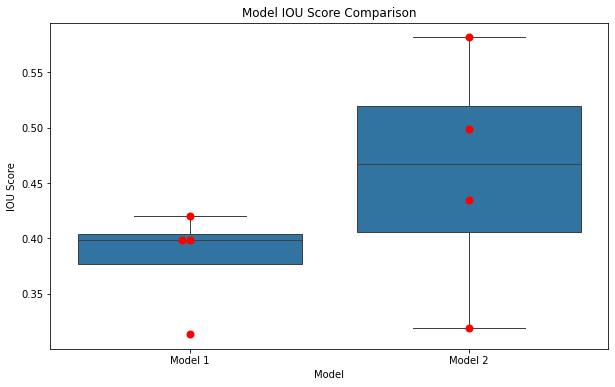

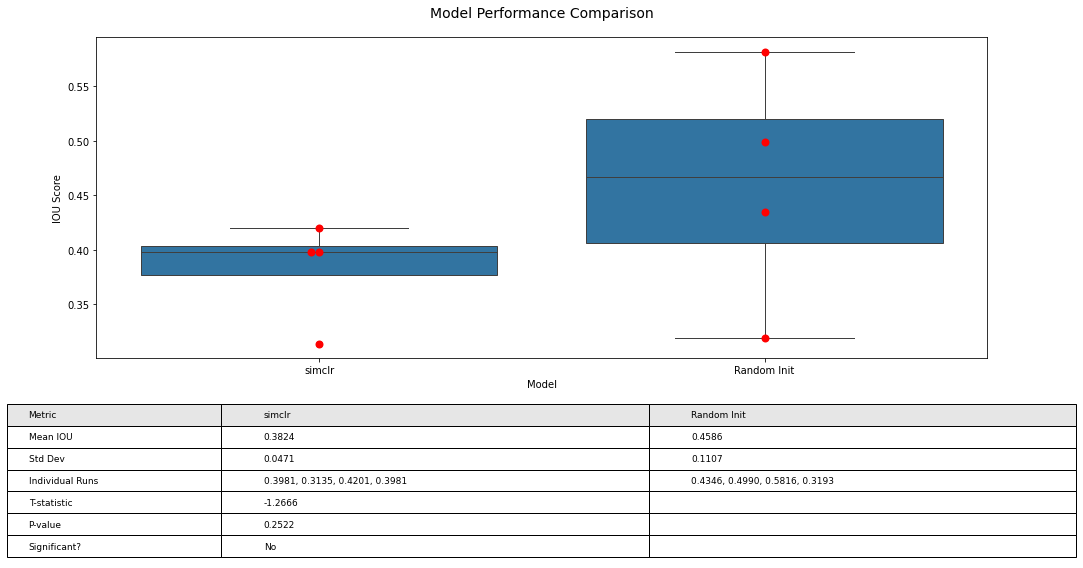

In [7]:
random_model = [0.39808, 0.31352, 0.42011, 0.39808]
imagenet_model = [0.51457, 0.43414, 0.31638, 0.27214]
simclr_model = [0.43463, 0.49897, 0.58162, 0.31928]
# Compare models
results = compare_models_iou(random_model, simclr_model)

# Print detailed results
print_comparison_results(results)

# Create visualization
plt = visualize_comparison(results)
plt.show()

plt = display_significance_results(
    random_model,
    simclr_model,
    "simclr",
    "Random Init"
)
plt.show()